<a href="https://colab.research.google.com/github/M-Arashi/SASA-DS/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR-10 Dataset**

The CIFAR-10 Dataset is an important image classification dataset. It consists of 60000 32x32 colour images in 10 classes (airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships, and trucks), with 6000 images per class. There are 50000 training images and 10000 test images.



# Data Processing

**Import Libraries**

In [6]:
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf

**Load Data**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
50000 train samples
10000 test samples


**Normalize The Data**

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.The normalization reduces the variance and skewness of the data, which helps the model to learn fast, improves generalization ability, and enhances model performance on unseen data. Here, we will divide the pixels of the images by 255  to scale them within the range [0,1].

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**plot first few images**

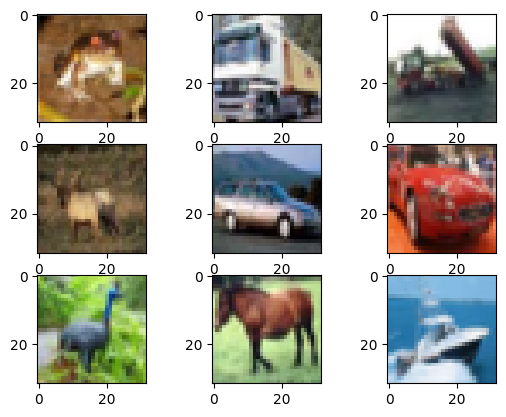

In [4]:
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

**Build CNN Model**

First, we create a neural network model that executes a sequence of layers in order.

Layer 1: A 2D convolutional layer with 32 filters of size 3x3. It uses ‘same’ padding and ReLU activation. Weight initialization follows the uniform He method, and the input dimensions are 32x32. Note: The ‘uniform_he’ parameter for the ‘initializer_kernel’ means that the He initialization method is used for initializing the weights of D2Conv and Dense layers. In this method, weight values are sampled from a uniform distribution with a standard deviation equivalent to sqrt(2/n), where n is the input size. This approach often leads to faster and more effective training of neural networks and prevents exploding/vanishing gradients.

Layer 2: Similar to Layer 1.

Layer 3: Applies max-pooling with 2x2 dimensions on the output of the convolutional layers.

Layer 4 (Flatten): Reshapes the output from the convolutional layers to a suitable format for fully connected layers.

Layer 5 (Dense): A fully connected layer with 128 neurons and ReLU activation added at the end of the model.

Layer 6 (Dense): Another fully connected layer with 10 nodes and softmax activation. Softmax converts numerical inputs into a probability distribution, representing the probabilities of different classes. The sum of these probabilities is always 1.

**Optimization method for model training**

We use the SGD (Stochastic Gradient Descent) optimizer from the legacy.optimizers.keras.tf module. The ‘learning_rate’ determines the weight update rate in each training step.The ‘momentum’ parameter helps the optimizer utilize previous gradients and aids in faster convergence.





In [7]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
opt = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1048704   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

**Compile The Model**

* The parameter "sparse_categorical_crossentropy" determines the loss function.
* In multi-class classification problems, we use the "sparse_categorical_crossentropy" loss function.
* This loss function is suitable when labels are represented as integer values.
* No need to one-hot encode the labels; they can remain as integers.
* The "accuracy" metric is used for model evaluation.
* You can retrieve model information using the summary command.

**Train The Model**

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [9]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 149s 95ms/step - loss: 1.2959 - sparse_categorical_accuracy: 0.5413
Epoch 2/15
1563/1563 [==============================] - 145s 93ms/step - loss: 0.9286 - sparse_categorical_accuracy: 0.6748
Epoch 3/15
1563/1563 [==============================] - 148s 95ms/step - loss: 0.7712 - sparse_categorical_accuracy: 0.7326
Epoch 4/15
1563/1563 [==============================] - 147s 94ms/step - loss: 0.6304 - sparse_categorical_accuracy: 0.7799
Epoch 5/15
1563/1563 [==============================] - 149s 95ms/step - loss: 0.5073 - sparse_categorical_accuracy: 0.8222
Epoch 6/15
1563/1563 [==============================] - 151s 97ms/step - loss: 0.3958 - sparse_categorical_accuracy: 0.8619
Epoch 7/15
1563/1563 [==============================] - 145s 93ms/step - loss: 0.2996 - sparse_categorical_accuracy: 0.8969
Epoch 8/15
1563/1563 [==============================] - 148s 94ms/step - loss: 0.2269 - sparse_categorical_accuracy: 0.9220
Epoch 9/

**Evaluate The Model Performance**

In [10]:
test_loss,test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 2.6846 - sparse_categorical_accuracy: 0.6459


In [11]:
print(test_loss)
print(test_accuracy)

2.684580087661743
0.6459000110626221
